# 이진 영상 처리

1. 영상 이진화  
영상 픽셀값을 0과 255로 만드는 연산  
  
임계값  
픽셀값이 특정값보다 크면 255, 이하이면 0으로 처리하여 이진화하는데 이 특정값을 임계값이라 한다.  
  
이진화함수  
cv2.threshold(src, 임계값, maxval(255), type(이진화 종류)) -> 임계값, 결과영상 반환  
  
type>  
cv2.THRESH_BINARY - 임계값 기준으로 0, maxval로 표현  
cv2.THRESH_BINARY_INV - THRESH_BINARY 반전  
cv2.THRESH_TRUNC - 임계값 이상은 maxval, 나머지는 그대로  
cv2.THRESH_TOZERO - 임계값 이상은 그대로, 나머지는 0  
cv2.THRESH_TOZERO_INV - THRESH_TOZERO 반전  


케니를 사용하기전 gray 스케일로 변환시키는데 gray를 하므로 연산이나 더 정확히 윤곽을 뽑아내기 위함이다.

블러처리를 하는 이유는 잡음 제거를 하기위함이다.

이진화 함수를 사용해서 0 아니면 1로 이미지를 표현하는 방법이 Threshold 함수이다.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c.jpg',0)

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)  # 이 방법을 가장 많이 사용한다.
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

자동 이진화  
히스토그램을 분석하여 배경과 객체의 중간 값 추출하여 임계값으로 설정  
  
cv2.THRESH_OTSU

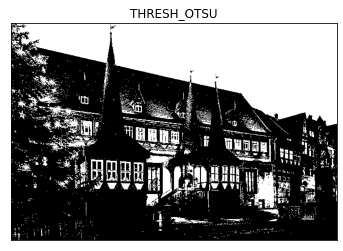

In [5]:
img = cv2.imread('c.jpg',0)
ret, thresh1 = cv2.threshold(img,0,255, cv2.THRESH_BINARY|cv2.THRESH_OTSU) # THRESH_OTSU  >> 임계값을 자동으로 잡아주는 outo 함수이다.
plt.imshow(thresh1,'gray')
plt.title('THRESH_OTSU')
plt.xticks([]),plt.yticks([])

plt.show()

지역 이진화  
균일하지 않은 밝기 영상의 이진화  
   
   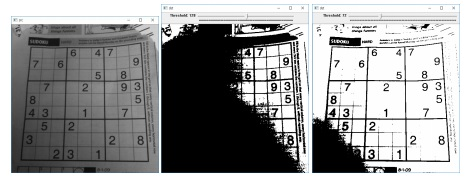  
   
=>해결: 이미지를 일정 크기의 사각형으로 분할하여 각 영역 내부의 픽셀 값 분포에 맞게 임계값 결정하여 이진화  


In [ ]:
import sys
import numpy as np
import cv2


# 입력 영상 불러오기
src = cv2.imread('img/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# 전역 이진화 by Otsu's method
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 지역 이진화 by Otsu's method
dst2 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4  # 넓이 이미지를 4등분으로 나눔. 
bh = src.shape[0] // 4  # 이미지의 높이를 4등분으로 나눔. 즉, 16개의 칸이 생김

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]  # 얕은 복사를 할 수 있도록...
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]  # 얕은 복사
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

# 결과 출력
cv2.imshow('src', src) 
cv2.imshow('dst1', dst1)  # 전역 이진화
cv2.imshow('dst2', dst2)  # 지역 이진화
cv2.waitKey()
cv2.destroyAllWindows()

적응형 이진화  
  
cv2.adaptiveThreshold(src, maxVal, adaptiveMethod, thresholdType, blockSize, C, dst) => dst(결과영상)  
  
maxVal: 임계값 함수 최대값(255)  
adaptiveMethod: 블록 평균 계산 방법. cv2.ADAPTIVE_THRESH_MEAN_C(산술평균), cv2.ADAPTIVE_THRESH_GAUSSIAN_C(가우시안 가중치 평균)  
thresholdType: 이진화 방법. cv2.THRESH_BINARY, cv2.THRESH_INV  
blockSize: 블록크기. 3이상의 홀수  
C: 평균에서 뺄값.  

In [2]:
import sys
import numpy as np
import cv2


src = cv2.imread('img/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()


def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0:
        bsize = bsize - 1
    if bsize < 3:
        bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


2. 모톨로지  
  
  영상을 형태학적 측면에서 다루는 기법  
  영상의 전처리나 후처리로 많이 사용됨  
    
1) 침식과 팽창  
침식: 커널이 객체 영역 안에 모두 포함될때 앵커(고정점)를 255로 설정  
      객체 외각을 깍아내는 연산 => 객체 크기 감소. 배경 확대 효과  
      => 실제 영상에서 작은 크기의 잡음 제거 효과
      
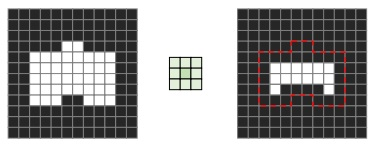
      
      cv2.erode(src, kernel, anchor, iterations, borderType, borderValue)  => dst  
      kernel: None이면 3x3  
      anchor: 고정점 위치. 기본값(-1,-1)은 정중앙점  
      iterations: 반복횟수. 기본값 1.  
      borderType: 테두리 처리 종류  
      borderValue: 확장 테두리 채울 값  
      
팽창: 커닐이 객체 영역 안에 하나라도 포함되면 앵커(고정점)를 255로 설정  
      객체 외각을 확대시키는 연산 => 객체 크기 확대. 배경 감소 효과  
      => 실제 영상에서 내부 홀(구멍)을 채우는 효과  
      
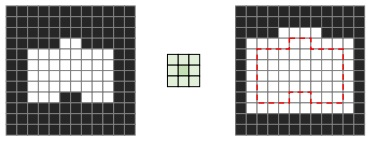
      
      cv2.dilate(src, kernel, anchor, iterations, borderType, borderValue)  => dst  
      kernel: None이면 3x3  
      anchor: 고정점 위치. 기본값(-1,-1)은 정중앙점  
      iterations: 반복횟수. 기본값 1.  
      borderType: 테두리 처리 종류  
      borderValue: 확장 테두리 채울 값  
      
모톨로지 커널 생성  
cv2.getStructuringElement(shape, ksize, anchor) => res  
shape: 커널모양.  
       cv2.MORTH_RECT: 사각형 모양  
       cv2.MORTH_CROSS: 십자가 모양  
       cv2.MORPH_ELLIPSE: 사각형에 내접하는 타원  
ksize: 커널크기. (가로, 세로)튜플  
anchor: 앵커 위치. (-1, -1)은 중앙점  
res: 0, 1로 구성된 행렬(커널).  

In [4]:
import sys
import numpy as np
import cv2


src = cv2.imread('img/circuit.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
dst1 = cv2.erode(src, se)

dst2 = cv2.dilate(src, None)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
se

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

2) opening과 closing  
opening: erode 후 dilate   
closing:  dilate 후 erode  
  
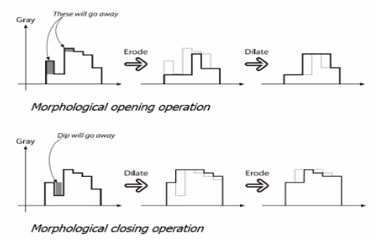  
  
opening => 작은 개체나 돌기 제거. 얇은 선 끊어짐  
closing => 작은 홈이나 홀 사라지고 얇은 연결선이 두꺼워짐. 윤곽 파악에 적합  
  
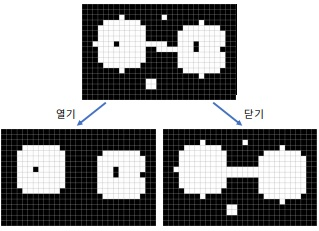  
  
범용 모폴로지 연산 함수  
  모톨로지 침식, 팽창, 오프닝, 클로징 등의 연산을 하나의 함수로 실행할 수 있음.  
  
cv2.morphologyEx(src, mode, kernel,anchor,iterations,borderType, borderValue) => dst  
  
mode: 연산 종류  
   cv2.MORPH_ERODE: 침식  
   cv2.MORPH_DILATE: 팽창  
   cv2.MORPH_OPEN:  opening  
   cv2.MORPH_CLOSE: closing  
   cv2.MORPH_GRADIENT: dilate 결과 – erode결과(d와 e의 차)  
 

In [5]:
import sys
import numpy as np
import cv2


src = cv2.imread('img/rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# src 영상에 지역 이진화 수행 (local_th.py 참고)
dst1 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst1[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

cnt1, _ = cv2.connectedComponents(dst1)  
print('cnt1:', cnt1)

dst2 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, None)  # 이미지에 쌀알만 추출할 수 있도록 
# 노이즈 를 제거해준다. 모폴로지로...

#dst2 = cv2.erode(dst1, None)
#dst2 = cv2.dilate(dst2, None)

cnt2, _ = cv2.connectedComponents(dst2)
print('cnt2:', cnt2)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


cnt1: 113
cnt2: 99


3. 레이블링  
  
객체 단위 분석: 객체를 분할하여 특징 분석. 객체 위치, 크기 정보, roi 추출, 모양 분석 등  
  
레이블링: 서로 연결되어 있는 객체 픽셀에 고유 번호 할당. 영역 기반 모양 분석. 레이블맵, 바운딩 박스, 픽셀 개수, 무게 중심 좌표 반환  
  
외곽선 검출: 객체 외곽선 좌표 검출. 외곽선 기반 모양 분석. 다양한 외곽선 처리 함수에서 활용(근사화, 컨벡스 헐 등)  
  
1)레이블링  
동일 객체에 속한 모든 픽셀에 고유번호 할당  
보통  이진 영상에서 수행  
  
픽셀 연결 관계  
4-이웃 연결관계  
8-이웃 연결관계 
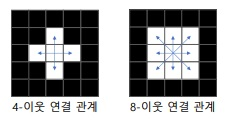
  
  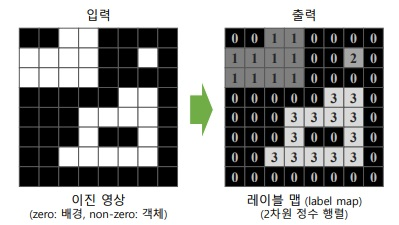  
  
레이블링 함수  
cv2.connectedComponents(src, connectivity, ltype) => retval, labels  
src: 8비트 1채널 영상  
connectivity: 4 또는 8. 기본값은 8  
ltype: labels 타입. 기본값은 cv2.CV_32S  
retval: 객체 개수(레이블 개수) N반환. 카운팅은 0부터 이고 0은 배경객체. 실제 객체 개수는 N-1개  
  
cv2.connectedComponentsWithStats(src, connectivity, ltype) => retval, labels, stats, centroids  
src: 8비트 1채널 영상  
connectivity: 4 또는 8. 기본값은 8  
ltype: labels 타입. 기본값은 cv2.CV_32S  
stats: 추출된 객체의 위치, 가로세로 길이, 면적 등의 정보  
centroids: 무게중심 정보  
  
  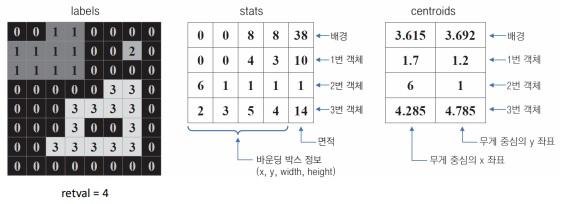  
  

In [6]:
import sys
import numpy as np
import cv2


src = cv2.imread('img/keyboard.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)
#갯수, 레이블 행렬 ,스테이트 행렬 무게중심행렬 
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(1, cnt):  # 박스를 계산함
    (x, y, w, h, area) = stats[i]

    if area < 20:
        continue

    cv2.rectangle(dst, (x, y, w, h), (0, 255, 255))  # 박스를 그려줌

cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


2) 외곽선 검출  
객체 외곽선 좌표 추출  
외부 외곽선 & 내부 외곽선 => 외곽선 계층 구조 표현 가능  
  
  cv2.findContours(img, mode, method, offset) => contours, hierachy  
  
mode: contours 찾는 방법 지정  
	cv2.RETR_EXTERNAL:  가장 바깥 경계선만 찾음  
	cv2.RETR_LIST:   모든 컨투어 탐색, hierachy 관계 구성 않음  
	cv2.RETR_CCOMP:   모든 컨투어 탐색,hierachy 관계 2단계 까지 구성  
	cv2.RETR_TREE:  모든 컨투어 탐색,모든 hierachy 관계 구성  
	
method: 컨투어 좌표와 관련된 설정  
	cv2.CHAIN_APPROX_NONE: 모든 컨투어 좌표 저장  
	cv2.CHAIN_APPROX_SIMPLE: 컨투어 라인을 그릴 수 있는 좌표만 저장  
	cv2.CHAIN_APPROX_TC89_L1: 컨투어 좌표 찾는 알고리즘  
	cv2.CHAIN_APPROX_TC89_KCOS: 컨투어 좌표 찾는 알고리즘  
  
offset: 좌표 이동 옵셋. 기본값(0,0)  
  
contours: 검출된 외곽선 좌표. len(contours)는 전체 길이이므로 외곽선 좌표의 개수가 됨. contours[i].shape=(k,1,2)k는 한 객체 외곽선 좌표 개수, contours[i].dtype=numpy.int32.  

hierachy: 외곽선 계층 정보. numpy.ndarray. shape=(1, N, 4). type=numpy.int32. hierarchy[0, i, 0] ~ hierarchy[0, i, 3]이 순서대로 next, prev, child, parent. 외곽선 인덱스를 가리킴. 해당 외곽선이 없으면 -1.  
  
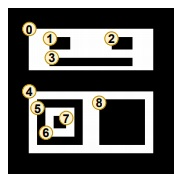  
  
cv2.RETR_EXTERNAL: 0 -> 4  
cv2.RETR_LIST: 0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8  
위 둘은 계층 정보 없음  
  
cv2.RETR_CCOMP: 0(1,2,3) -> 4(5,8) -> 6(7)    
cv2.RETR_TREE: 0(1,2,3) -> 4((5,6,7), 8)  
  
3) 외곽선 그리기  
cv2.drawContours(img, contours, contourIdx, color, thickness=None,
lineType=None, hierarchy=None, maxLevel=None, offset=None)
=> img  
  
contours: (cv2.findContours() 함수로 구한) 외곽선 좌표 정보  
contourIdx: 외곽선 인덱스. 음수(-1)를 지정하면 모든 외곽선을 그림  
color:외곽선 색상  
thickness:외곽선 두께. thinkness < 0이면 내부를 채움  
lineType:LINE_4, LINE_8, LINE_AA 중 하나 지정  
hierarchy:외곽선 계층 정보  
maxLevel:그리기를 수행할 최대 외곽선 레벨. maxLevel = 0 이면 contourIdx로 지정된 외곽선만 그림  
  
<사용예>  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
ret, thresh = cv2.threshold(gray, 127, 255, 0)  
contours, hierachy = cv2.findContours(thresh, cv2.CHAIN_APPROX_SIMPLE)  
cont_img = cv2.drawContours(img, contours, -1, (0,0,255), 2)  


In [8]:
import sys
import random
import numpy as np
import cv2


src = cv2.imread('img/contours.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

contours, hier = cv2.findContours(src, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

idx = 0
while idx >= 0:
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst, contours, idx, c, 2, cv2.LINE_8, hier)
    idx = hier[0, idx, 0]  # 다음 컨투어의 인덱스 , 현재행의 0번째는 다음 idx를 가르킨다

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [7]:
import sys
import random
import numpy as np
import cv2


src = cv2.imread('img/milkdrop.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)

contours, _ = cv2.findContours(src_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

h, w = src.shape[:2]
dst = np.zeros((h, w, 3), np.uint8)

for i in range(len(contours)):
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst, contours, i, c, 1, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


4)속성들  
*moments: 이미지의 특징들. 넓이, 중심점  
contours, hierachy = cv2.findContours(thresh, cv2.CHAIN_APPROX_SIMPLE)  
cont1 = contours[0]  
M = cv2.moments(cont1)  
print(M['m00'])#cont1 영역의 넓이 출력  
print(M['m10']/M['m00']) #중심점의 x좌표  
print(M['m01']/M['m00']) #중심점의 y좌표  
  
*contour영역의 넓이  
cv2.contourArea(cont1)#넓이 반환  
  
*contour 둘레 길이  
cv2.arcLength(cont1, True/False)#True:막힌영역, False:뚤린 영역 의미  
  
*contour의 포인트 줄이기 – 대략적 모양은 유지  
cv2.approxPolyDP(cont1, 근사치, True/False)#True:막힌영역, False:뚤린 영역 의미	=>리턴값: 근사치로 줄인 포인트 array  
  
<사용예>  
p1 = 0.01 * cv2.arcLength(cont1, True)#곱하는 숫자가 클수록 점의 수는 작아짐  
p2 = 0.1 * cv2.arcLength(cont1, True)  
  	
ap = cv2.approxPolyDP(cont1, p1, True)  
cont_img = cv2.drawContours(img, [ap], 0, (0,0,255), 2)  
  
*convex hull  
contour의 모든 점을 포함하면서 볼록한 점들을 연결한 선  
contours, hierachy = cv2.findContours(thresh, cv2.CHAIN_APPROX_SIMPLE)  
for cnt in contours:  
     hull = cv2.convexHull(cnt)#convex hull 추출   
     cont_img = cv2.drawContours(img, [hull], 0, (0,0,255), 2)	
  
*bounding rectangle  
컨투어 영역을 모두 포함한 사각형의 좌측 상단 좌표와 가로, 세로 길이 반환  
contours, hierachy = cv2.findContours(thresh, cv2.CHAIN_APPROX_SIMPLE)  
cont1 = contours[0]  
x,y,w,h = cv2.boundingRect(cont1)  
img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255),2)  
  
*최소한의 사각형(컨투어 각도에 맞추어 사각형 만듦)  
rect = cv2.minAreaRect(cont1)#컨투어를 포함한 최소한 크기의 사각형  
box = cv2.boxPoints(rect)#사각형의 4점을 반환  
cont_img = cv2.drawContours(img, [box], 0, (0,0,255), 2)  
  
*컨투어 포함한 원  
#컨투어를 포함한 원의 중심점 좌표와 반지름 반환  
(x, y), r = cv2.minEnclosingCircle(cont1)  
  
*컨투어 포함한 타원  
e = cv2.fitEllipse(cont1)#컨투어를 포함한 타원의 정보 반환  
  
*컨투어의 가로, 세로 비율  
x,y,w,h = cv2.boundingRect(cont1)  
r = w/h  
  
*컨투어 면적과 bounding 면적의 비  
area = cv2.contourArea(cont1)  
x,y,w,h = cv2.boundingRect(cont1)  
b_area = w*h  
r =area/b_area  
  
*컨투어 면적과 convex hull 면적의 비  
area = cv2.contourArea(cont1)  
hull = cv2.convexHull(cont1)  
h_area = area = cv2.contourArea(hull)  
r = area/h_area  
  
*컨투어를 영역의 동서남북 4꼭지점 찾기  
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])  
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])  
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])  
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])  
  
*컨투어 계층구조(hierachy)  
contours, hierachy = cv2.findContours(thresh, cv2.CHAIN_APPROX_SIMPLE)  	
print(hierachy)  
=>실행결과  
array([[[ 1, -1, -1, -1],		#[next, prev, child, parent]. -1은 없음을 의미  
        [ 2,  0, -1, -1],  
        [ 3,  1, -1, -1],  
        [ 4,  2, -1, -1],  
        [ 5,  3, -1, -1],  
        [ 6,  4, -1, -1],  
        [ 7,  5, -1, -1],  
        [ 8,  6, -1, -1],  
        [-1,  7, -1, -1]]])  


5) 외곽선 관련 함수
  
cv2.arcLength(): 외곽선 길이를 반환  
  
cv2.contourArea(): 외곽선이 감싸는 영역의 면적을 반환  
  
cv2.boundingRect(): 주어진 점을 감싸는 최소 크기 사각형(바운딩 박스) 반환  
  
cv2.minEnclosingCircle(): 주어진 점을 감싸는 최소 크기 원을 반환  
  
cv2.minAreaRect(): 주어진 점을 감싸는 최소 크기 회전된 사각형을 반환  
  
cv2.minEnclosingTriangle(): 주어진 점을 감싸는 최소 크기 삼각형을 반환  
  
cv2.approxPolyDP(): 외곽선을 근사화(단순화)  
  
cv2.fitEllipse(): 주어진 점에 적합한 타원을 반환  
  
cv2.fitLine(): 주어진 점에 적합한 직선을 반환  
  
cv2.isContourConvex(): 컨벡스인지를 검사  
  
cv2.convexHull(): 주어진 점으로부터 컨벡스 헐을 반환  
  
cv2.convexityDefects(): 주어진 점과 컨벡스 헐로부터 컨벡스 디펙트를 반환  

6) 다각형 검출 프로그램  
  
구현 순서  
1)이진화  
2)외곽선 찾기  
3)외곽선 근사화  
4)너무 작은 객체와 컨벡스가 아닌 객체 제외  
5)꼭지점 개수 확인 => 삼각형, 사각형 검출 => 원 판별  
  
<원판별>  
객체 외곽선 길이에 대한 넓이 비율이 가장 넓음  
=>도형 넓이와 외곽선 길이의 비율 검사 => 결과가 1에 가까울수록 원으로 판단  
  
length = cv2.arcLength(pts, True)  
area = cv2.contourArea(pts)  
#도형 넓이와 외곽선 길이의 비율 검사  
ratio = 4. * math.pi * area / (length * length)  
if ratio > 0.85:   #비율 결과가 1에 가까우면  
setLabel(img, pts, '원')  

In [12]:
import math
import cv2


def setLabel(img, pts, label):
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 1)
    cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))


def main():
    img = cv2.imread('img/polygon.bmp', cv2.IMREAD_COLOR)

    if img is None:
        print('Image load failed!')
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    for pts in contours:
        if cv2.contourArea(pts) < 400:  #  너무 작으면 무시
            continue

        approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

        vtc = len(approx)

        if vtc == 3:
            setLabel(img, pts, 'TRI')
        elif vtc == 4:
            setLabel(img, pts, 'RECT')
        else:
            length = cv2.arcLength(pts, True)
            area = cv2.contourArea(pts)
            ratio = 4. * math.pi * area / (length * length)

            if ratio > 0.85:
                setLabel(img, pts, 'CIR')

    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()


main()

과제1: 명함 추출하여 텍스트 출력    
과제2: 자동차 번호판 인식  

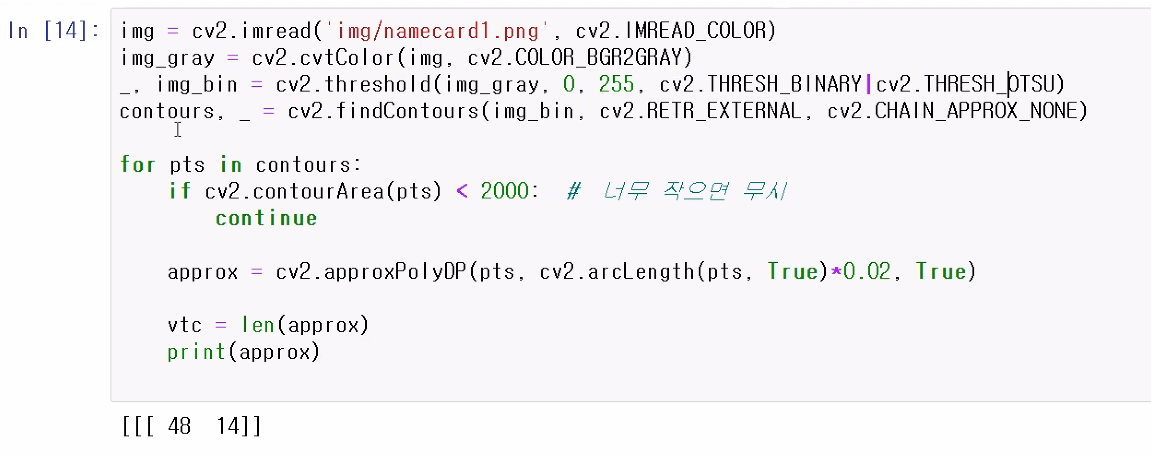

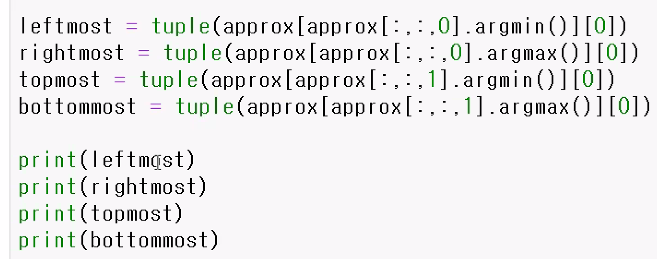

In [5]:
import cv2
import numpy as np

img = cv2.imread('img/namecard1.png', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_bin = cv2.threshold(img_gray, 0,255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for pts in contours:
    if cv2.contourArea(pts) < 2000: # 너무 작으면 무시한다.
        continue
    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)  # 좀더 공부해보기
    
    vtc = len(approx)
    print(approx)
    
LB = tuple(approx[approx[:,:,0].argmin()][0])
RT = tuple(approx[approx[:,:,0].argmax()][0])
LT = tuple(approx[approx[:,:,1].argmin()][0])
RB = tuple(approx[approx[:,:,1].argmax()][0])

print(LB)  # 좌측하단 
print(RT)  # 우측상단
print(LT)  # 좌측상단 
print(RB)  # 우측하단

# w = 400
# h = 85
# src_ptn = [[topmost[0],topmost[1]],
#            [rightmost[0],rightmost[1]],
#            [leftmost[0]],[lestmost[1]],
#            [bottommost[0],bottommost[1]]
# dst_ptn = [[0,0],[w,0],[0,h],[w,h]] # 좌측상단 우측상단, 좌측하단, 우측하단

[[[ 48  14]]

 [[  1 255]]

 [[380 341]]

 [[436  99]]]
(1, 255)
(436, 99)
(48, 14)
(380, 341)


In [6]:
# from PIL import Image
# from pytesseract import *
# affince 로 구현
img = cv2.imread('namecard1.png')

width, height = 400, 250

pts1 = np.float32([[LT[0],LT[1]], [RT[0],RT[1]], [LB[0],LB[1]]])  # points 1 Ltop, Rtop, Lbottom, Rbottom 가져올 픽셀 좌표 지정
pts2 = np.float32([[0,0], [width,0], [0,height]])  # points 2

matrix = cv2.getAffineTransform(pts1,pts2)  # 좌표 변환값을 참고하여 변환 행렬을 생성한다.
imgOutput = cv2.warpAffine(img, matrix, (width, height))  # 이미지에 matrix를 warping함

cv2.imshow('Image',img)
cv2.imshow('Image Output',imgOutput)


# image_to_string(image,lang='kor+eng')
# text = image_to_string(image)

# print(text)


cv2.waitKey(0) | 0xFF == ord('q')  
cv2.destroyAllWindows()

In [7]:
# perspective 로 구현
img = cv2.imread('namecard1.png')

width, height = 550, 350

pts1 = np.float32([[LT[0],LT[1]], [RT[0],RT[1]], [LB[0],LB[1]], [RB[0],RB[1]]])  # points 1 Ltop, Rtop, Lbottom, Rbottom 가져올 픽셀 좌표 지정
pts2 = np.float32([[0,0], [width,0], [0,height], [width,height]])  # points 2

matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgOutput = cv2.warpPerspective(img, matrix, (width, height))  # 이미지에 matrix를 warping함

cv2.imshow('Image',img)
cv2.imshow('Image Output',imgOutput)


cv2.waitKey(0) | 0xFF == ord('q')  
cv2.destroyAllWindows()

In [28]:
# 과제 1 : 명함 텍스트 출력
import cv2
import numpy as np
ix,iy = -1,-1


# Mouse Callback함수
def draw_circle(event, x,y, flags, param):
    global ix,iy

    if event == cv2.EVENT_LBUTTONDOWN: #마우스를 누른 상태
        ix, iy = x,y
        print(f'x:{ix}, y:{iy}')


img = cv2.imread('namecard1.png')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while True:
    cv2.imshow('image', img)
    

    k = cv2.waitKey(1) & 0xFF

   
    if k == 27:        # esc를 누르면 종료
        break

cv2.destroyAllWindows()
    


x:281, y:163


In [15]:
img = cv2.imread('namecard1.png')

width, height = 550, 350

pts1 = np.float32([[54,27], [421,108], [0,239], [369,326]])  # points 1 Ltop, Rtop, Lbottom, Rbottom 가져올 픽셀 좌표 지정
pts2 = np.float32([[0,0], [width,0], [0,height], [width,height]])  # points 2

matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgOutput = cv2.warpPerspective(img, matrix, (width, height))  # 이미지에 matrix를 warping함

cv2.imshow('Image',img)
cv2.imshow('Image Output',imgOutput)

cv2.waitKey(0) | 0xFF == ord('q')
cv2.destroyAllWindows()

In [11]:
namecard = imgOutput
cv2.imshow('namecard',namecard)

cv2.waitKey(0) | 0xFF == ord('q')
cv2.destroyAllWindows()

In [13]:
# 과제 2 : 자동차 번호판 인식
img_car = cv2.imread('img/car.jpg')

cv2.imshow('car', img_car)
cv2.waitKey(0) | 0xFF == ord('q')
cv2.destroyAllWindows()

In [ ]:
import cv2
##################
frameWidth = 640
frameHeight = 480
n_PlateCascade = cv2.CascadeClassifier('Resources/haarcascade_russian_plate_number.xml')
minArea = 500
color = (255,0,255)
##################

# cap = cv2.VideoCapture(0)
# cap.set(3, frameWidth)
# cap.set(4, frameHeight)
# cap.set(10, 150)
img_car
while True:
    success, img = cv2.imread
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    numberPlates = n_PlateCascade.detectMultiScale(imgGray, 1.1, 4)

    for (x, y, w, h) in numberPlates:
        area = w*h
        if area > minArea:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(img, 'Number Plate', (x,y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, color, 2)
            imgRoi = img[y:y+h, x:x+w]
            cv2.imshow('ROI', imgRoi)

    cv2.imshow("Result", img)
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break